## Gower distance for ordinal categorical variables

$$M_{ij} = \dfrac{\sum_{k = 1}^N w_{ijk}h_{ik} - w_{ijk}^2}{\sum_{k = 1}^N
			w_{ijk}}$$

4 variáveis com todas as posibilidades

In [1]:
import itertools

In [2]:
variables = list(itertools.product([1, 2, 3, 4], repeat=4))

In [3]:
def weight(categories, max_categories_ranks = [4, 4, 4, 4]):
    return list(map(lambda x: x[0]/x[1], zip(categories, max_categories_ranks)))
         
companies_weights = list(map(lambda x: { "company": x, "weights": weight(x), "candidates_merits": [] }, variables))

In [4]:
merits = []
for company in companies_weights:
    for candidate in companies_weights:
        candidate_weights = candidate['weights']
        numerator = 0
        for company_weight, candidate_weight in zip(company['weights'], candidate['weights']):
            numerator += (company_weight*candidate_weight) - (company_weight**2)
        company["candidates_merits"].append(numerator / sum(company['weights']))

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

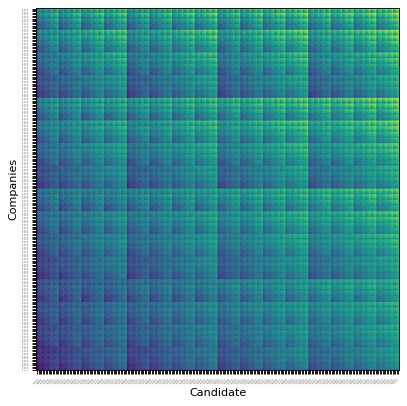

In [9]:
companies = candidates = variables

merits = np.array(list(map(lambda x: x["candidates_merits"], companies_weights)))
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
im = ax.imshow(merits)

ax.set_xlabel('Candidate')
ax.set_ylabel('Companies')

ax.set_xticks(np.arange(len(candidates)))
ax.set_yticks(np.arange(len(companies)))

ax.set_xticklabels(candidates, fontsize=1)
ax.set_yticklabels(companies, fontsize=1)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Causes error to open SVG
#for i in range(len(companies)):
#    for j in range(len(candidates)):
#        text = ax.text(j, i, merits[i, j],
#                       ha="center", va="center", color="w", fontsize=1)

plt.savefig('result.svg', format='svg', dpi=1200)